# IBM Quantum Challenge: Spring 2023

## 첫 단계

IBM Quantum Challenge: Spring 2023에 오신 것을 환영합니다!

이번 IBM Quantum Challenge의 주제는 동적 회로 (Dynamic Circuit) 이고 이번 챌린지의 첫 번째 랩 입니다. 이번 랩을 진행 하면서 몇 가지의 문제를 완료하셔야 합니다. 이 소개 섹션에서는 연습 문제들을 완료하는데 도움이 되는 간략한 개요를 제공합니다. 이전 챌린지를 
참여 하셨다면 이 자료는 좋은 복습 자료가 될 것입니다.

모든 연습 문제에는 튜토리얼 컨탠츠, 사전 작성된 코드 블록 및 사용자가 직접 Qiskit 코드를 입력해야 하는 연습 문제 코드 블록이 포함되어 있습니다. 연습 문제를 완료하는 데 필요한 코드는 _"### Your code goes here ###"_ 주석이 있는 줄 아래에 입력해야 합니다.

새로운 코드를 작성하지 않았더라도 모든 코드 셀을 실행해야 하며, 채점자 (grader) 을 실행하여 답안을 제출할 때 모든 코드가 최신 상태로 유지되도록 해야 합니다.

### 맛보기 예제

아래 셀에서 우리는 단일 큐비트와 단일 고전적 비트로 회로를 구성합니다. 첫 번째 작업은 큐비트에서 하다마드 (Hadamard) 게이트를 수행한 다음 측정하여 결과를 클래식 비트에 저장하는 것입니다. 이번 예제에서는 코드가 이미 입력되어 있으며 두 줄의 시작 부분에서 `#` 을 제거하기만 하면 됩니다.

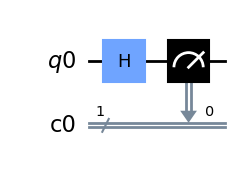

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

####### your code goes here #######

qc.h(qr[0])
qc.measure(qr[0], cr[0])


qc.draw("mpl")

잘했습니다! 각 연습문제가 끝난 후에 작성된 답안이 맞는지 확인하는 작업이 필요합니다. 이를 위해, 단순히 채점자 셀을 실행합니다.

한번 실행 해 봅시다. 다음 셀에서는 변수 `answer_0`에 대한 정수 값을 설정할 것을 요청합니다. 정수가 1에서 5 사이이면 채점자가 정답이 올바르다는 Congratulation 메시지를 반환합니다. 다른 숫자를 입력하면 반대되는 메시지가 표시됩니다.

원하는 대로 답을 설정한 다음 등급 셀을 실행하여 결과를 확인해봅시다. 재미 삼아 서로 다른 번호로 여러 번 시도해볼 수 있습니다.

In [2]:
answer_0: int
answer_0 = 3

##### Hint: Remember to run this cell after changing your value ###

In [3]:
# Grader Cell: Run this to submit your answer

from qc_grader.challenges.spring_2023 import grade_ex1a

grade_ex1a(answer_0)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Now you're all set to start this challenge. Good luck and have fun!

이제 여러분은 이 챌린지를 시작할 준비가 되었습니다. 행운을 빌고 즐거운 양자 여행 되세요!

# 동적 회로 소개 및 성공할 때까지 반복하기

## 소개

[Qiskit textbook,](https://learn.qiskit.org/course/ch-algorithms/quantum-circuits)에 따르면
>_"양자 회로는 큐비트에 대한 결맞음 양자 연산으로 구성된 계산 루틴입니다... 이것은 양자 게이트, 측정 및 재설정의 순서가 지정된 시퀀스이며, 이 모든 것이 실시간 고전적 계산에 의해 조건적이거나 데이터를 사용할 수 있습니다"_

정의의 마지막 부분에 대해 잘 모를 수도 있지만 동적 회로와 모든 관련이 있습니다. 일반적으로 양자 회로에 대해 말할 때 우리는 명시적으로 말하지 않더라도 _정적 (static)_ 양자 회로를 말합니다. 그렇다면 동적 회로란 무엇일까요?

**동적 회로**는 중간 회로 측정값을 포함하는 양자 회로이며, 측정 결과는 회로의 후반부에서 양자 게이트를 조절하는 데 사용됩니다. 고전적인 측정 결과에 대한 미래 양자 연산을 조건화하는 능력은 고전적인 피드포워드 (feedforward)로 알려져 있습니다.

고전적인 피드포워드가 왜 필요할까요? 예를 들어 Qiskit에서 [`reset`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.reset.html)  작업을 사용해 본 적이 있으면 익숙한, 조건부 재설정 작업을 고려해 보십시다. 초기 상태에 관계없이 큐비트를 0으로 재설정하는 비 유니타리 연산이지만, 이미 측정된 큐비트에 대해 조건부 재설정 연산을 수행하여 큐비트가 측정된 값이 1인 경우에만 비트 플립 X 게이트를 적용하여 0으로 재설정합니다.

<center>
<img src="resources/sketch-1.png" width="50%">
</center>

즉, 동적 회로란 if 문과 while 루프와 같은 제어 흐름을 포함하는 양자 회로로, 조건부는 이전의 큐비트 측정 결과로부터 계산되고 조건부 연산은 양자 게이트를 포함합니다.

## Hello Dynamic Circuit World

IBM Quantum 하드웨어는 이미 한동안 중간 회로 측정 및 재설정 기능을 지원했습니다. 그러나 기존 피드포워드에 대한 지원을 추가하려면 제어 시스템 및 관련 소프트웨어 스택을 대폭 재설계해야 했습니다. 따라서 작년(2022년)에 부터 동적 회로에 대한 완전한 지원이 도입되었습니다.

Qiskit에서는 동적 회로를 프로그래밍하기 위한 구문이 여러 번 반복되었으며, 아직 완전한 지원이 구현되지 않았습니다. 현재 동적 회로의 모든 기능에 액세스할 수 있는 유일한 방법은 OpenQASM 3로 작성된 프로그램을 제출하는 것입니다. 그럼에도 불구하고, 우리는 Qiskit에서 현재 사용 가능한 것만을 사용할 것입니다.

Qiskit의 이전 버전에서는 [`c_if()`](https://qiskit.org/documentation/stubs/qiskit.circuit.Instruction.c_if.html) 명령어를 소개했지만, 이 문법은 더 유연한 QuantumCircuit의 [`if_test()`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.if_test.html) 메서드를 선호하는 방향으로 사용이 점차 줄어들 예정입니다. 이 메서드는 이번 챌린지에서 주로 사용할 것입니다.

시작을 위해, 이 함수를 사용하는 간단한 예를 복습해봅시다. 다음 단계를 통해 조건부 reset 작업을 보여주는 회로를 만들어 보겠습니다:

1. 1개의 큐비트와 2개의 고전적 비트로 회로를 초기화합니다. ($q_{0}$, $b_{0}$ 그리고 $b_{1}$)
2. $q_{0}$ 에 Hadamard 게이트를 적용합니다.
3. 그 큐비트를 측정하고 결과를 $b_{0}$ 에 저장합니다.
4. $b_{0}$ 이 1과 같을 때 조건부로 `if_test` 블록을 시작합니다.
5. `if_test` 블록에서, 조건이 충족되면 수행할 연산을 지정합니다. 이 경우, $q_{0}$ 를 0 상태로 전환하는 것입니다.
6. 항상 0을 얻는지 확인하기 위해 $q_0$ 을 다시 측정하고 $b_{1}$ 에 저장합니다.

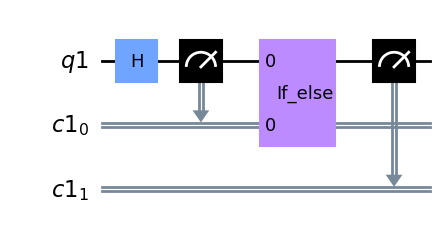

In [4]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# unpack the qubit and classical bits from the registers
(q0,) = qr
b0, b1 = cr

# apply Hadamard
qc.h(q0)
# measure
qc.measure(q0, b0)

# begin if test block. the contents of the block are executed if b0 == 1
with qc.if_test((b0, 1)):
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
    qc.x(q0)
# finally, measure q0 again
qc.measure(q0, b1)

qc.draw(output="mpl", idle_wires=False)

이제 회로가 구축되었으므로 회로를 여러 번 실행하여 항상 예상하는 결과값을 얻을 수 있는지 확인해 보겠습니다. 첫 번째 측정값은 0 또는 1일 수 있지만 두 번째 측정값은 항상 0이어야 합니다.

In [5]:
from qiskit_aer import AerSimulator

# initialize the simulator
backend_sim = AerSimulator()

# run the circuit
reset_sim_job = backend_sim.run(qc)
# get the results
reset_sim_result = reset_sim_job.result()
# retrieve the bitstring counts
reset_sim_counts = reset_sim_result.get_counts()

print(f"Counts: {reset_sim_counts}")

Counts: {'00': 502, '01': 522}


예상대로 첫 번째 비트는 때때로 0이고 때로는 1이지만 두 번째 비트는 항상 0입니다 (Qiskit에서 리틀 엔디언 (little-endian) 비트 순서를 사용하므로 오른쪽 끝 비트가 첫 번째 비트이고 왼쪽 끝 비트가 마지막 비트입니다).

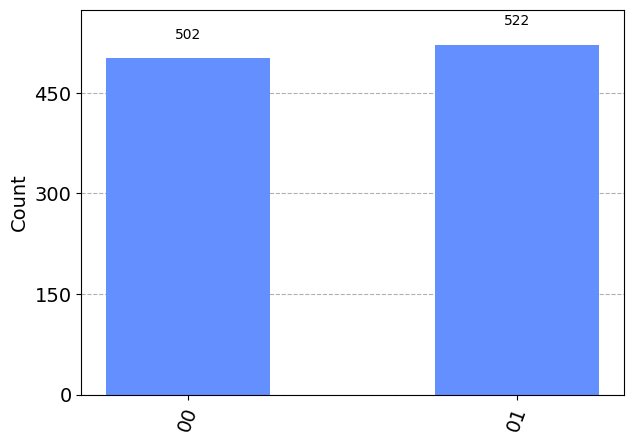

In [6]:
from qiskit.visualization import *

# plot histogram
plot_histogram(reset_sim_counts)

이제 첫 번째 동적 회로를 구축할 준비가 되었습니다!

### **연습 문제 1**

다음 단계로 나아가 봅시다. 첫 번째 과제는 두 큐비트 회로를 설계하는 것이 될 것입니다. 이 경우, 목표는 $q_{0}$ 의 값에 따라 $q_{1}$ 에 다르게 작용하는 것입니다. $q_{0}$ 의 측정이 0을 읽으면 $q_{1}$ 에 $X$ 게이트를 적용합시다. 1을 읽으면 대신 $q_{1}$ 에 하다마드 게이트를 적용합니다.

$q_{0}$ 의 값을 무작위로 만들기 위해, 우리가 할 첫 번째 것은 해당하는 큐비트에 하다마드를 적용하는 것입니다. 다음으로, 우리는 $q_{0}$ 를 $b_{0}$ 에 측정합니다. 그 후에, 동적 마법이 일어나게 되며, 마지막으로, $q_{1}$ 이 측정됩니다.

이 연습 문제를 위해 [`if_test()`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.if_test.html) 문서를 읽어보시기 바랍니다.

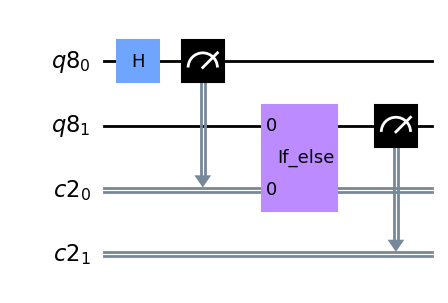

In [7]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

q0, q1 = qr
b0, b1 = cr

qc.h(q0)
qc.measure(q0, b0)

####### your code goes here #######

with qc.if_test((b0, 0)) as else_:
    qc.x(q1)
with else_:
    qc.h(q1)

qc.measure(q1, b1)
qc.draw(output="mpl", idle_wires=False)

선택적으로 다음 셀을 실행하여 회로가 예상대로 작동하는지 확인할 수 있습니다.
>팁: 실행하기 전에 회로의 예상되는 가능한 결과를 생각해 보세요.

In [8]:
backend_sim = AerSimulator()

job_1 = backend_sim.run(qc)
result_1 = job_1.result()
counts_1 = result_1.get_counts()

print(f"Counts: {counts_1}")

Counts: {'01': 253, '11': 259, '10': 512}


In [9]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex1b

grade_ex1b(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## 성공할 때 가지 반복하기

때때로 진행의 결과는 무작위적이며 원하는 결과가 나오지 않을 수도 있습니다. 이런 경우에 무엇을 할 수 까요? 자, 다시 시도해 보세요! 원하는 결과가 확률이 0이 아닌 이상 과정을 반복하게 되면 원하는 결과가 나오게 됩니다. 종종, 조금의 반복만 필요할 수도 있습니다.

이 섹션에서는 성공할 때까지 반복 아이디어를 사용하여 유한 게이트 세트 $\{H,\,X,\,S,\,\text{Toffoli}\}$에서 $R_X(\theta)$ 게이트를 구축할 것입니다. 여기서 $\theta / \pi$ 는 무리수 입니다. 구체적으로, $\cos\theta = \frac35$ 를 구축하게 됩니다. 이 구조는 Nielsen and Chuang, _Quantum Computation and Quantum Information_, 10<sup>th</sup> anniversary edition, Exercise 4.41 에서 수정되었으며 위에 주어진 유한 게이트 세트의 범용성을 보여줍니다.

이 구조는 3개의 큐비트로 작동하는 회로를 만들게 됩니다. 큐비트 중 하나는 target 큐비트이며 우리의 목표는 이 target 큐비트에서 $R_X(\theta)$ 를 작동하는 것 입니다. 다른 두 큐비트는 우리가 측정할 "syndrome" 큐비트이며 측정 결과는 우리의 작업이 성공적이었는지 여부를 알려줍니다. 두 syndrome 큐비트가 모두 0이면 게이트가 성공적으로 수행되었음을 알 수 있습니다. 그렇지 않으면 큐비트를 재설정하고 다시 시도하게 됩니다. 측정 결과에 따라 회로의 반복을 조절하려면 동적 회로가 필요합니다.

### 연습 문제 2

이 섹션의 첫 번째 목표는 해당 회로를 반환하는 함수를 만드는 것입니다. 다음은 회로의 모양에 대한 이미지는 아래와 같습니다:

<center>
<img src="resources/circuitRx.png">
</center>

사용자가 쉽게 사용할 수 있도록 필요한 요소를 사용하여 "기본 (basde)" 회로를 설정합니다. 이 실험실에서 작성할 기능은 회로를 입력으로 사용하여 제자리에서 수정합니다. 만약 새 회로가 필요하다면 기본 회로를 복사하게 됩니다.

In [10]:
controls = QuantumRegister(2, name="control")
target = QuantumRegister(1, name="target")

mid_measure = ClassicalRegister(2, name="mid")
final_measure = ClassicalRegister(1, name="final")

base = QuantumCircuit(controls, target, mid_measure, final_measure)

다음 셀에서 다음 단계를 수행하여 회로를 구성하도록 'trial' 함수를 완성합시다:

1. control 레지스터의 각 큐비트와 target 큐비트에 하다마드 게이트를 적용합니다.
2. conrol 레지스터와 target 큐비트 사이에 Toffoli(controlled-controlled-not) 게이트를 적용합니다. 이 작업은 QuantumCircuit의 `ccx` 방법을 사용하거나 `qiskit.circuit.library`에서 `CCXGate`를 불러와 수행할 수 있습니다.
3. target 큐비트에 $S$ 게이트를 적용합니다
4. 2단계와 동일한 control 및 target으로 다른 Topoli 게이트를 적용합니다.
5. 다시 control 레지스터와 target 레지스터에 Hadamard를 적용합니다.
6. control 레지스터를 고전적 레지스터로 측정합니다.

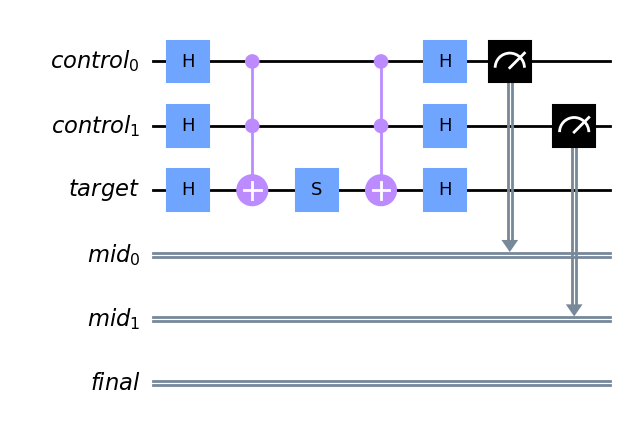

In [11]:
def trial(
    circuit: QuantumCircuit,
    target: QuantumRegister,
    controls: QuantumRegister,
    measures: ClassicalRegister,
):
    """Probabilistically perform Rx(theta) on the target, where cos(theta) = 3/5."""

    ####### your code goes here #######

    circuit.h(target)
    circuit.h(controls)
    circuit.ccx(controls[0], controls[1], target)
    circuit.s(target)
    circuit.ccx(controls[0], controls[1], target)
    circuit.h(target)
    circuit.h(controls)
    circuit.measure(controls, measures)

qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
qc.draw("mpl", cregbundle=False)

In [12]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1c

grade_ex1c(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### 연습 문제 3

다음 작업으로는 측정값을 확인하는 것입니다. control 비트의 두 측정 모두 $\ket{0}$을 반환하는 경우 적용된 게이트는 $R_X(\theta)$ 이며, 구체적으로는 $\cos(\theta) = \frac{3}{5}$ 입니다. 측정값 중 하나라도 $\ket{1}$ 이면 적용된 게이트는 단순히 $X$ 게이트이며, 오류를 나타냅니다. 따라서, 측정을 통해 target 큐비트의 결맞음을 방해하지 않고 올바른 게이트를 적용했는지 여부를 알 수 있습니다.

오류가 발생하면 큐비트를 재설정하고 다시 시작해야 합니다. 오류 발생 시 무엇이 적용되는지 알고 있으므로 일반적인 하드웨어 재설정을 사용하지 않고도 이 지식을 사용하여 효율적인 재설정을 수행할 수 있습니다. 두 개의 보조 큐비트의 경우, 각각의 측정값이 $1$ 이라는 조건하에는 단지 $X$ 게이트 입니다.

다음 셀에서 `reset_controls` 함수를 입력하여 다음 단계를 수행하여 회로를 수정합니다:

1. `measures` 레지스터의 첫 번째 비트가 1이면 첫 번째 control 큐비트에 $X$ 게이트를 적용합니다.
2. `measures` 레지스터의 두 번째 비트가 1이면 두 번째 control 큐비트에 $X$ 게이트를 적용합니다.

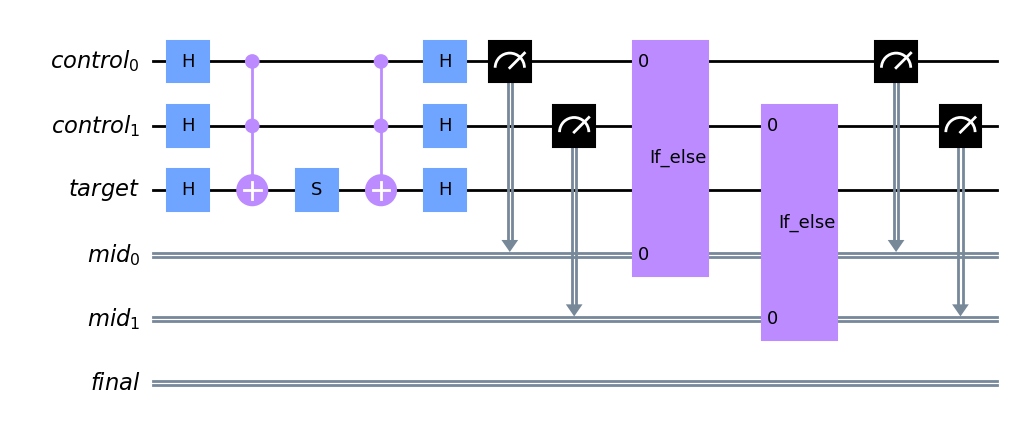

In [13]:
def reset_controls(
    circuit: QuantumCircuit, controls: QuantumRegister, measures: ClassicalRegister
):
    """Reset the control qubits if they are in |1>."""

    ####### your code goes here #######
    
    with circuit.if_test((measures[0], 1)):
        circuit.x(controls[0])
    with circuit.if_test((measures[1], 1)):
        circuit.x(controls[1])

qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
reset_controls(qc, controls, mid_measure)
qc.measure(controls, mid_measure)
qc.draw("mpl", cregbundle=False)

In [14]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1d

grade_ex1d(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


이제 남은 일은 조건이 충족되지 않은 회로의 실행을 반복하는 것입니다.
마지막 연습 문제에서는 현재 지원하는 동적 회로에 대한 두 가지 문제를 해결해야 합니다.

첫 번째 문제는 Qiskit이 현재 고전적인 비트에 대한 산술 또는 논리 연산을 수행하는 것을 지원하지 않는다는 것입니다. 특히 고전적인 레지스터에 특정 값이 *없다*는 확인을 지원하지 않습니다. 우리 상황에서는 중간 회로 측정값이 비트 문자열 `00`이 아닌 경우에만 시행을 반복해야 합니다. 이 문제를 해결하기 위해 측정값이 `00`과 동일한 것을 조건으로 하는 if 문을 만들고 빈 블록을 **pass**한 다음 **else** branch를 사용하여 측정값이 `00` 이 *아닌* 경우에 원하는 논리를 수행합니다.

두 번째 문제는 현재 하드웨어가 루프를 지원하지 않는다는 것입니다. 따라서 성공할 때까지 반복 루프를 실행할 수 없습니다. 우리는 시험 회로를 횟수를 지정하고 반복함으로써 이 문제를 해결할 것입니다.

### 연습 문제 4

아래의 코드 셀에서 `else` 블록에 syndrome 측정 결과에 따라 시행을 반복해야 하는 경우 수행해야 하는 논리를 입력합니다:

1. target 큐비트를 0 상태로 재설정합니다. 하지만 이 큐비트가 1 상태라는 것을 이미 알고 있다는 것을 기억해야 합니다.
2. 회로에 'trial' 함수를 다시 호출합니다.

In [ ]:
# Set the maximum number of trials
max_trials = 2

# Create a clean circuit with the same structure (bits, registers, etc)
# as the initial base we set up.
circuit = base.copy_empty_like()

# The first trial does not need to reset its inputs, since the controls
# are guaranteed to start in the |0> state.
trial(circuit, target, controls, mid_measure)

# Manually add the rest of the trials.  In the future, we will be
# able to use a dynamic `while` loop to do this, but for now, we
# statically add each loop iteration with a manual condition check
# on each one.  This involves more classical synchronizations than
# the while loop, but will suffice for now.
for _ in range(max_trials - 1):
    reset_controls(circuit, controls, mid_measure)
    with circuit.if_test((mid_measure, 0b00)) as else_:
        # This is the success path, but Qiskit can't directly
        # represent a negative condition yet, so we have an
        # empty `true` block in order to use the `else` branch.
        pass
    with else_:
        ####### your code goes here #######


# We need to measure the control qubits again to ensure we
# get their final results; this is a hardware limitation.
circuit.measure(controls, mid_measure)

# Finally, let's measure our target, to check that we're
# getting the rotation we desired.
circuit.measure(target, final_measure)

circuit.draw("mpl", cregbundle=False)

In [ ]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1e

grade_ex1e(circuit)

이 회로를 시뮬레이터에 실행해봅시다.

In [ ]:
sim = AerSimulator()
job = sim.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

두 컨트롤의 측정이 `00` 상태로 끝난 다면 성공적인 결과입니다. 결과에 문제가 있는 경우, 결과에 대해 디스코드 채널에 게시하여 다른 참가자들과 협력하고 결과가 의미하는 바와 결과를 얻는 이유를 이해하는 것이 좋습니다.

## 하드웨어에 실행하기

우리가 만든 회로를 실제 하드웨어에서 실행해 보겠습니다! 이를 위해 동적 회로를 위해 특별히 조정된 27큐비트 Peekskill 장치를 사용할 것입니다. 하지만 실제 하드웨어에서 실행하는 데는 시간이 걸리고 오류가 발생할 수 있습니다. 이러한 셀을 반복해서 **실행하지 마십시오**. 반복 실행은 다른 모든 챌린지 참가자들의 백업의 원인이 될 수 있습니다.

In [ ]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()

In [ ]:
hub = "YOUR_HUB"
group = "YOUR_GROUP"
project = "YOUR_PROJECT"

backend_name = "ibm_peekskill"
backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

In [ ]:
from qiskit import transpile

qc_transpiled = transpile(circuit, backend)
job = backend.run(qc_transpiled, shots=1000, dynamic=True)

In [ ]:

counts = job.result().get_counts()

plot_histogram(counts)

## 축하합니다!

첫 번째 랩의 끝에 도착했습니다! 이제 동적 회로에 대해 자세히 알아보았으니 다음 실습으로 이동하여 일부 활용과 고급 속성에 대해 알아보겠습니다. 행운을 빕니다!

Translated by: Inho Choi @Inho Choi (Slack)